# Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings('ignore')

Feature Explanation:

Cut of diamond: fair, good, very good, premium, ideal

Color of diamond: D, E, F, G, H, I, J (best to worst)

Clarity: A measurement of how clear the diamond is - I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

Depth: Total depth percentage = z / mean (x, y) = 2 * z / (x + y)

Table: width of the top of diamond relative to the widest point

Price price in US dollars

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

carat: weight of the diamond (0.2--5.01)

# Preprocessing and Understanding the Data

In [2]:
data = pd.read_csv('../input/diamonds/diamonds.csv')
data_price = pd.read_csv('../input/diamonds/diamonds.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
len(data) #length of the data before removing Null and 0 zero values

53940

# Summarizing the Numeric data

In [4]:
data.drop('Unnamed: 0', axis = 1, inplace = True) #dropping the unnamed: 0 column


In [5]:
data.describe() # this will help us identify the what kind of values are there in the table.

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Dropping the Data with Zero Values

In [6]:
# from the above data we can see that x, y, z have values = 0, we removed these values as well.
data = data[(data[['x','y','z']] != 0).all(axis=1)]

In [7]:
len(data) #there were 20 rows with 0 value.

53920

## Based on the GIA Color Scale, the diamonds color groups have been colored

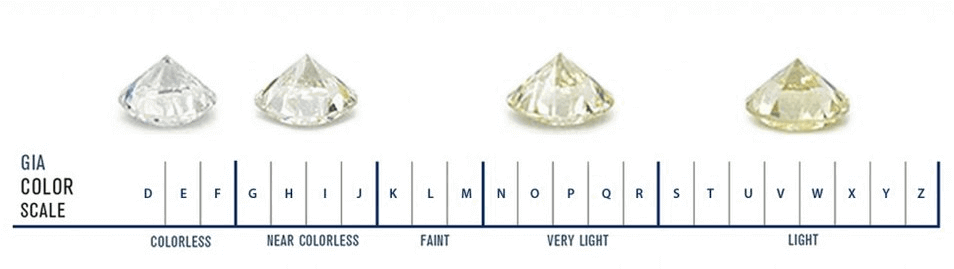

# Visualizing Carat Attribute

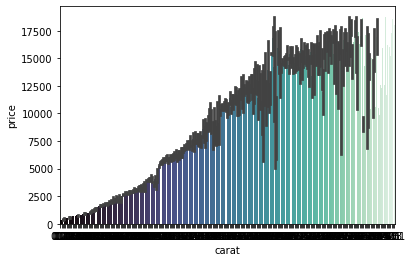

In [8]:
sns.barplot(x = "carat", y = "price", palette="mako",data = data)
plt.show()

# Visualizing Price vs Cut

<AxesSubplot:xlabel='cut', ylabel='price'>

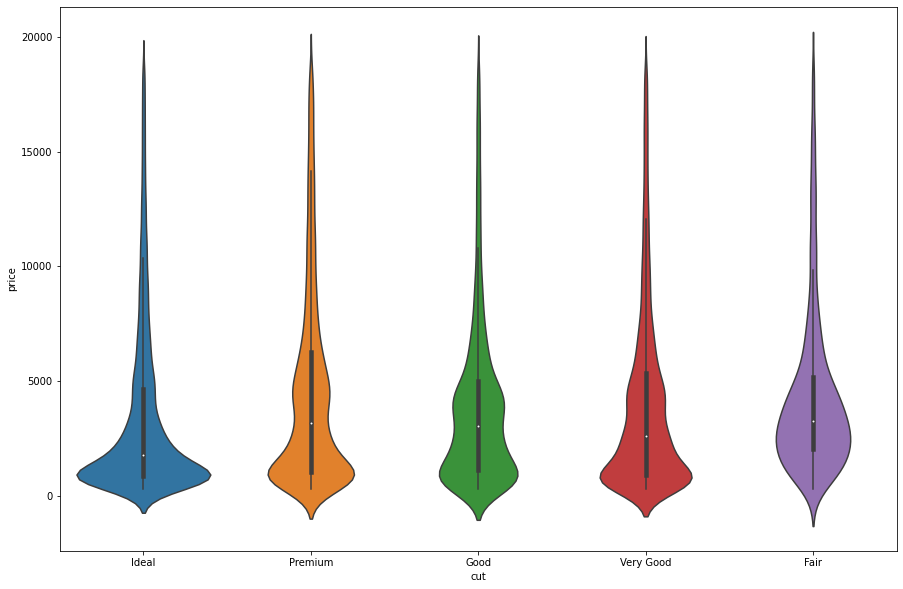

In [9]:
y = data['price'].value_counts()
x = data['cut'].value_counts()
plt.figure(figsize = (15,10))
sns.violinplot(y=data.price,x=data.cut,data=data)

# Visualizing Price vs Clarity

<AxesSubplot:xlabel='clarity', ylabel='price'>

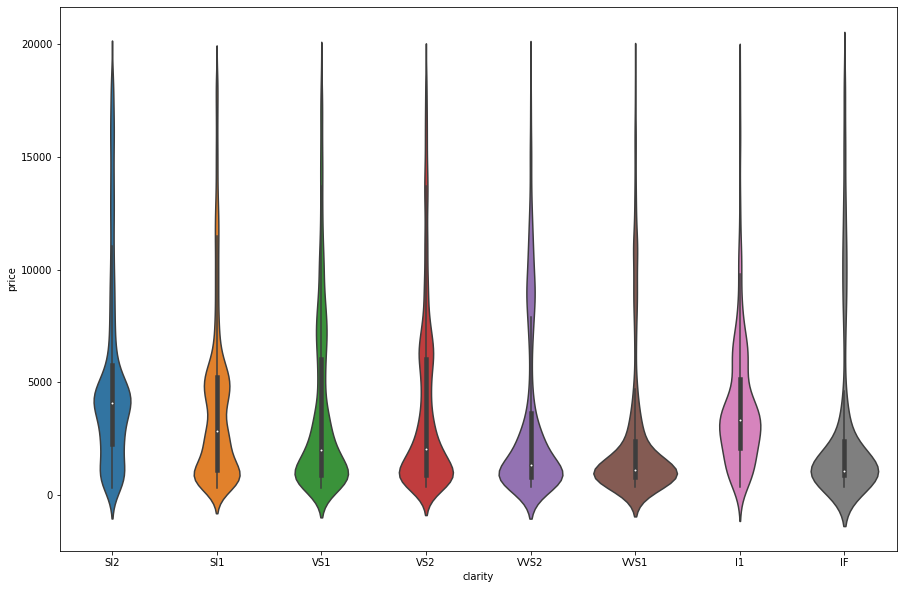

In [10]:
y =data['price'].value_counts()
x = data['clarity'].value_counts()
plt.figure(figsize = (15,10))
sns.violinplot(y=data.price,x=data.clarity,data=data)

# Visualizing Price vs Depth

<Figure size 720x432 with 0 Axes>

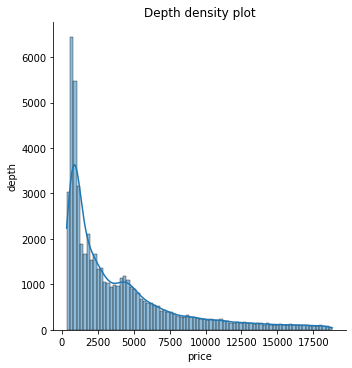

In [11]:
y =data['depth'].value_counts()
#x = data['color'].value_counts()
fig = plt.figure(figsize=(10,6))
sns.displot(data.price,kde=True)
plt.title('Depth density plot')
plt.xlabel("price")
plt.ylabel("depth")
plt.show()

# Boxplot of Depth Attribute

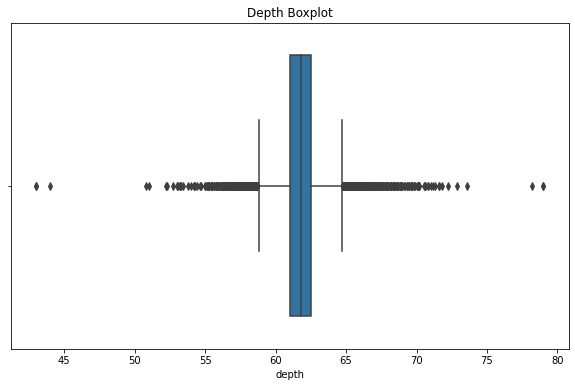

In [12]:
x = data['depth'].value_counts()
fig = plt.figure(figsize=(10,6))
sns.boxplot(data.depth)
plt.title('Depth Boxplot')
plt.xlabel("depth")
plt.show()

# Visualizing Price vs Carat

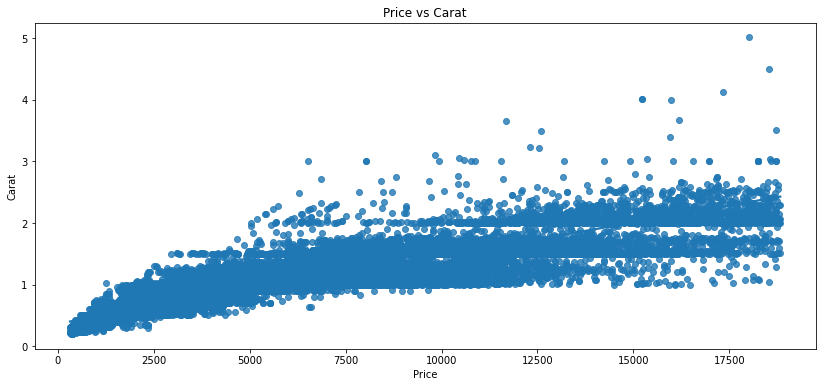

In [13]:
y = data['price'].value_counts()
x = data['carat'].value_counts()
fig = plt.figure(figsize=(14,6))
sns.regplot(x=data.price,y=data.carat)
plt.title('Price vs Carat')
plt.xlabel("Price")
plt.ylabel("Carat")
plt.show()

# Visualizing Heat Map

<AxesSubplot:>

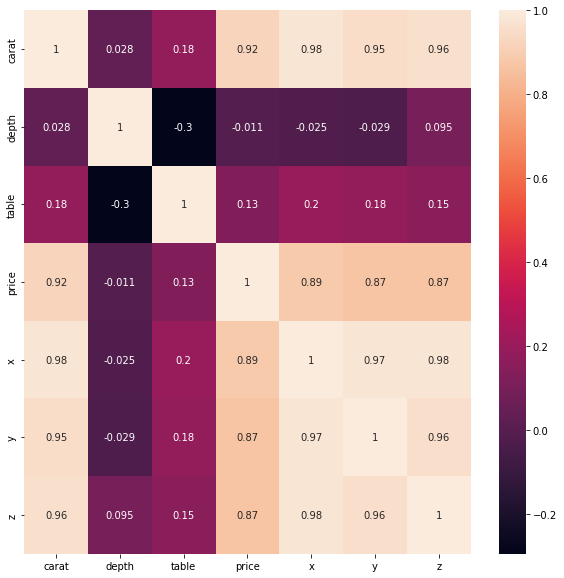

In [14]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(),annot=True, cmap='rocket')

In [15]:
d = data

# Checking for Missing Values

In [16]:
d.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# Label Encoding Data Object Attributes Cut, Clarity & Color

In [17]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

encoder.fit(d['cut'])
d['cut'] = encoder.transform(d['cut'])

encoder.fit(data['color'])
d['color'] = encoder.transform(d['color'])

encoder.fit(d['clarity'])
d['clarity'] = encoder.transform(d['clarity'])

# Displaying the data

In [18]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [19]:
d.color.value_counts()

3    11284
1     9797
2     9538
4     8298
0     6774
5     5421
6     2808
Name: color, dtype: int64

# Standardizing the Data Using Scalar Transform

In [20]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(d)
scaled_d = scaler.transform(d)

# Displaying Heatmap

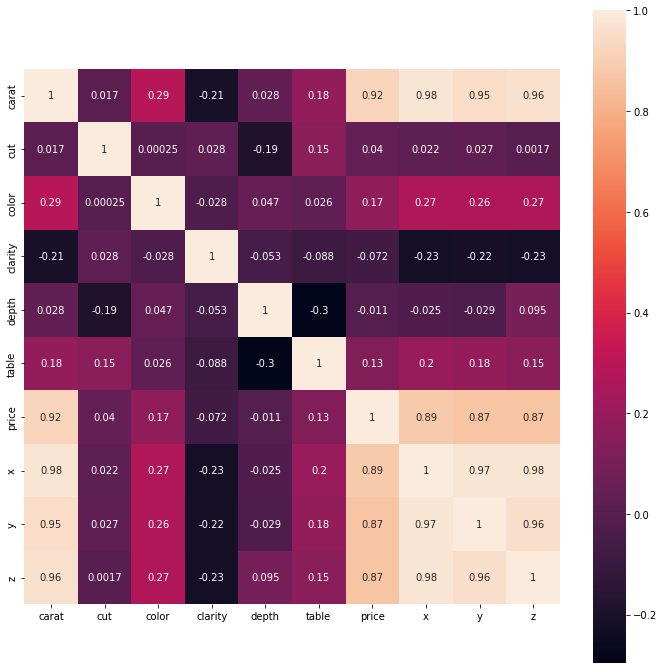

In [21]:
plt.figure(figsize = (12,12))
sns.heatmap(data = d.corr(), square = True, annot = True);

In [22]:
data.drop('price', axis = 1, inplace = True)

# K-means clustering 

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [24]:
data_standardized = data[['carat','depth','table','x','y','z']]
scaler = MinMaxScaler()
scaler.fit(data_standardized)
scaler.transform(data_standardized)

array([[0.00623701, 0.51388889, 0.23076923, 0.03138374, 0.00543281,
        0.04425643],
       [0.002079  , 0.46666667, 0.34615385, 0.02282454, 0.0028975 ,
        0.04035145],
       [0.00623701, 0.38611111, 0.42307692, 0.04564907, 0.00706266,
        0.04035145],
       ...,
       [0.1039501 , 0.55      , 0.32692308, 0.27532097, 0.03621876,
        0.08102831],
       [0.13721414, 0.5       , 0.28846154, 0.34522111, 0.04418689,
        0.08688578],
       [0.11434511, 0.53333333, 0.23076923, 0.29957204, 0.03965954,
        0.08363163]])

#### We have standardized the data using scalar transform
#### Now, we need to find the optimal no. of clusters for our data, we have used Elbow Method to find the n clusters

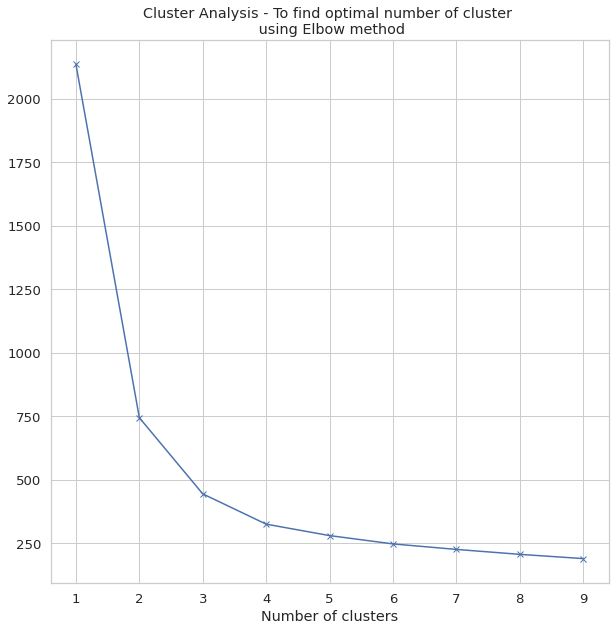

In [25]:
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize = (10,10))
sse = []
for i in range(1, 10):
    kmeans_diamonds = KMeans(n_clusters=i,
                            init='k-means++',
                            n_init=10,
                            max_iter=300,
                            random_state=0)
    kmeans_diamonds.fit(scaler.transform(data_standardized))
    sse.append(kmeans_diamonds.inertia_) #wcss have been appended into the capture, which will 
                                             #will be helpful while plotting Elbow method graph to find the optimal
                                             #number of clusters for the KMeans Clustering 
    
plt.plot(range(1,10), sse, marker='x')
plt.xlabel('Number of clusters')
plt.title('Cluster Analysis - To find optimal number of cluster \n using Elbow method')
plt.show()


#### From the above image, we can surely say we have 3 as the optimal number of clusters.
#### Further, we train the model with n= 3, excluding the price attribute

In [26]:
kmeans_clusters = KMeans(n_clusters = 3,
                        init = 'k-means++',
                        n_init = 10,
                        max_iter = 300,
                        random_state=0)
kmeans_clustering = kmeans_clusters.fit(scaler.transform(data_standardized))
kmeans_predict = kmeans_clusters.fit_predict(scaler.transform(data_standardized))
data['cluster'] = kmeans_clustering.labels_
data_labels = kmeans_clustering.labels_

In [27]:
data['cluster'].unique()

array([1, 0, 2], dtype=int32)

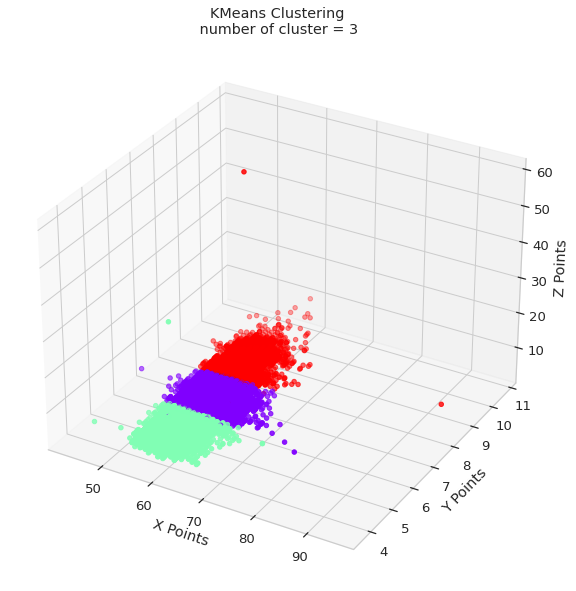

In [28]:
plt.figure(figsize=(10, 10))
ax = plt.axes(projection ="3d")
ax.scatter3D(data.iloc[:,5], data.iloc[:,6],data.iloc[:,7], cmap = 'rainbow',c = data_labels, marker="o", picker=True)
plt.title('KMeans Clustering \n number of cluster = 3 ')
plt.xlabel('X Points')
plt.ylabel('Y Points')
ax.set_zlabel('Z Points')
plt.show()

In [29]:
Z = data_standardized
Z['cluster_name'] = kmeans_predict
Z['price'] = data_price["price"]
Z

,carat,depth,table,x,y,z,cluster_name,price
0,0.23,61.5,55.0,3.95,3.98,2.43,1,326
1,0.21,59.8,61.0,3.89,3.84,2.31,1,326
2,0.23,56.9,65.0,4.05,4.07,2.31,1,327
3,0.29,62.4,58.0,4.20,4.23,2.63,1,334
4,0.31,63.3,58.0,4.34,4.35,2.75,1,335
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,0,2757
53936,0.72,63.1,55.0,5.69,5.75,3.61,0,2757
53937,0.70,62.8,60.0,5.66,5.68,3.56,0,2757
53938,0.86,61.0,58.0,6.15,6.12,3.74,0,2757


# Price Prediction Model

In [30]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import preprocessing 

In [31]:
data = data_price
x = data_price['x']
y = data_price['y']
z = data_price['z']
data_price['vol'] = x * y * z

In [32]:
data_price = data_price[['carat','cut','color','clarity','depth','table','price','vol']]

In [33]:
encoder = LabelEncoder()

encoder.fit(data_price['cut'])
data_price['cut'] = encoder.transform(data_price['cut'])

encoder.fit(data_price['color'])
data_price['color'] = encoder.transform(data_price['color'])

encoder.fit(data_price['clarity'])
data_price['clarity'] = encoder.transform(data_price['clarity'])

In [34]:
X = data_price.drop(['price'], axis=1) #sepearating price from the data set, as we need to train the data against the price
                                       # using the rest of the attribute present in the dataset.
y = data_price['price']

In [35]:
X.head()

,carat,cut,color,clarity,depth,table,vol
0,0.23,2,1,3,61.5,55.0,38.202030
1,0.21,3,1,2,59.8,61.0,34.505856
2,0.23,1,1,4,56.9,65.0,38.076885
3,0.29,3,5,5,62.4,58.0,46.724580
4,0.31,1,6,3,63.3,58.0,51.917250


In [36]:
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Linear Regression

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
coef=model.coef_
coef

array([ 8.25430439e+03,  7.88327528e+01, -2.59340755e+02,  2.99384877e+02,
       -1.04407252e+02, -9.50061788e+01,  6.42939744e-01])

In [40]:
intercept =model.intercept_
intercept

8495.610192278746

In [41]:
p = model.predict([[0.99, 3, 2, 9, 78, 70, 190]])
print("The price of the test diamond after linear regression is", p)

The price of the test diamond after linear regression is [4407.61257459]


In [42]:
yr = coef[0]*0.99  +  coef[1]*3   +   coef[2]*2    +    coef[3]*9    +   coef[4]*78   +  coef[5]*70 +    coef[6]*190 + intercept
yr

4407.612574585934

In [43]:
y_predlr = model.predict(X_test)
y_predlr

array([-126.22218983, 3557.46273517, 2125.11414521, ..., 8360.98676694,
       5455.26148364, 5382.73690357])

In [44]:
model.score(X_train, y_train) # Linear Regression model score on Train data

0.8802164454094557

In [45]:
linear_model_score = model.score(X_test,y_test)*100
linear_model_score #Linear Regression model score on Test Data

88.07779566102613

In [46]:
X

,carat,cut,color,clarity,depth,table,vol
0,0.23,2,1,3,61.5,55.0,38.202030
1,0.21,3,1,2,59.8,61.0,34.505856
2,0.23,1,1,4,56.9,65.0,38.076885
3,0.29,3,5,5,62.4,58.0,46.724580
4,0.31,1,6,3,63.3,58.0,51.917250
...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,115.920000
53936,0.72,1,0,2,63.1,55.0,118.110175
53937,0.70,4,0,2,62.8,60.0,114.449728
53938,0.86,3,4,3,61.0,58.0,140.766120


In [47]:
random_XL = X
random_XL
random_XL['Predicted_Price'] = model.predict(random_XL)
random_XL['Actual_Price'] = y_test

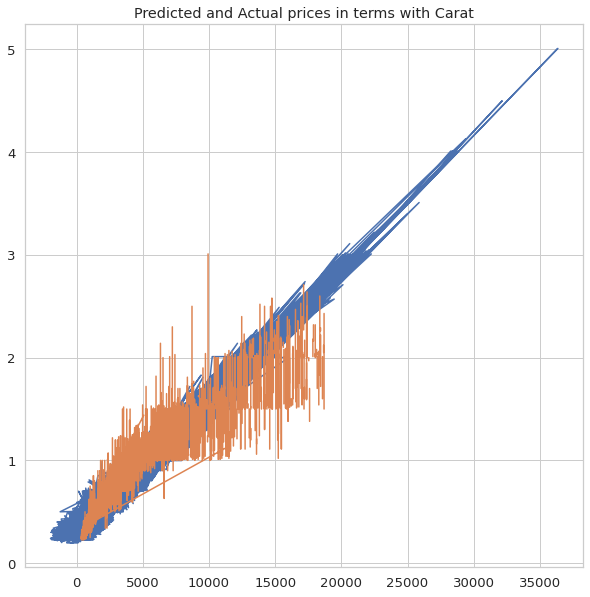

In [48]:
plt.figure(figsize=(10,10))
yaxis_value = random_XL[['carat']]
xaxis_value = random_XL[['Predicted_Price','Actual_Price']]
plt.plot(xaxis_value, yaxis_value)
plt.title('Predicted and Actual prices in terms with Carat')
plt.show()

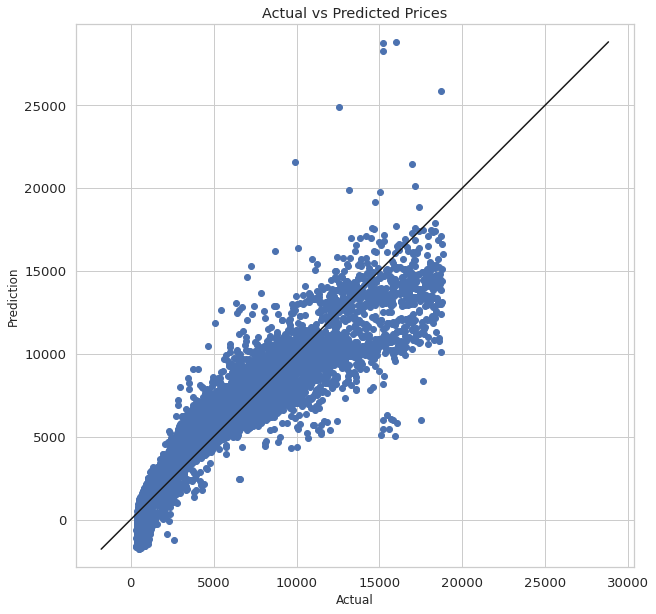

In [49]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_predlr)

point1 = max(max(y_predlr), max(y_test))
point2 = min(min(y_predlr), min(y_test))
plt.plot([point1, point2], [point1, point2], "k-")
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Prediction', fontsize=12)
plt.title('Actual vs Predicted Prices')
plt.axis('equal')
plt.show()

#### Ideal Value for R Squared is between 0 to 1 <br> Ideal Value for Mean Squared Error should be positive, value = 0 that means predictor is perfect <br> Ideal value fro Root mean squared Error should be more than 0.75 for prediciton

In [50]:
print("R Squared value is: ", r2_score(y_test, y_predlr))
print("Mean Squared Error value is :", mean_squared_error(y_test,y_predlr))
print("Root Mean Squared Error value is:",np.sqrt(mean_squared_error(y_test, y_predlr)))

R Squared value is:  0.8807779566102614
Mean Squared Error value is : 1872941.5632995826
Root Mean Squared Error value is: 1368.5545525479


### Model Evaluation on a test diamond for Linear Regression

In [51]:
testing_diamond = [0.22,0.21,0.23,0.29,0.31,0.32,0.24] # Test diamond for the rest of the models in the 

In [52]:
model.predict([testing_diamond])[0]

10292.671356898045

# Random Forest Regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

RandomForestRegressor()

In [54]:
y_pred2 = model2.predict(X_test)

In [55]:
model2.score(X_train, y_train) # Random Forest model score on Train data

0.9973065922461444

In [56]:
Random_forest_score = model2.score(X_test, y_test)*100
Random_forest_score #Random Forest model score on Test data

98.08280666549562

In [57]:
print("R Squared value is: ", r2_score(y_test, y_pred2))
print("Mean Squared Error value is:", mean_squared_error(y_test,y_pred2))
print("Root Mean Squared Error value is:",np.sqrt(mean_squared_error(y_test, y_pred2)))

R Squared value is:  0.9808280666549563
Mean Squared Error value is: 301185.1650064253
Root Mean Squared Error value is: 548.803393763582


### Model Evaluation on a test diamond for Random Forest

In [58]:
model2.predict([testing_diamond])[0]

500.34

# Actual vs Predicted Prices for Random Forest Regressor

In [59]:
#X.head()

In [60]:
random_X = X.drop(['Predicted_Price', 'Actual_Price'],axis=1)
random_X.head()

,carat,cut,color,clarity,depth,table,vol
0,0.23,2,1,3,61.5,55.0,38.202030
1,0.21,3,1,2,59.8,61.0,34.505856
2,0.23,1,1,4,56.9,65.0,38.076885
3,0.29,3,5,5,62.4,58.0,46.724580
4,0.31,1,6,3,63.3,58.0,51.917250


In [61]:
random_X['Predicted_Price'] = model2.predict(random_X)

In [62]:
random_X['Actual_Price'] = y

#### We added the predicted price from the Random Regressor model next to the actual price from the dataset

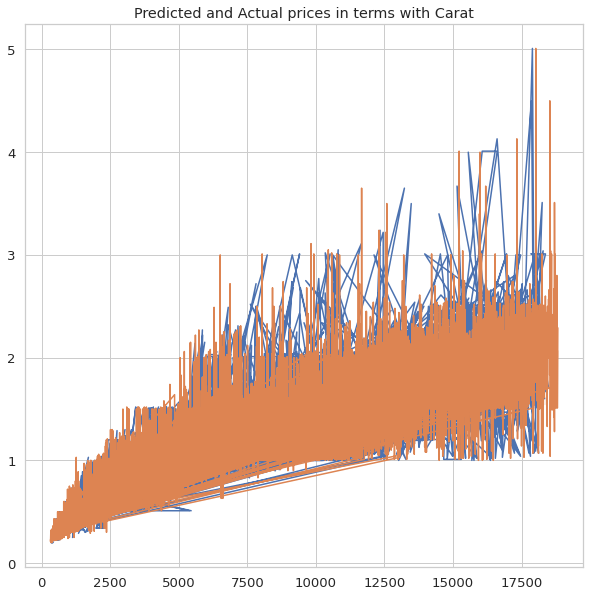

In [63]:
plt.figure(figsize=(10,10))
yaxis_value = random_X[['carat']]
xaxis_value = random_X[['Predicted_Price','Actual_Price']]
plt.plot(xaxis_value, yaxis_value)
plt.title('Predicted and Actual prices in terms with Carat')
plt.show()

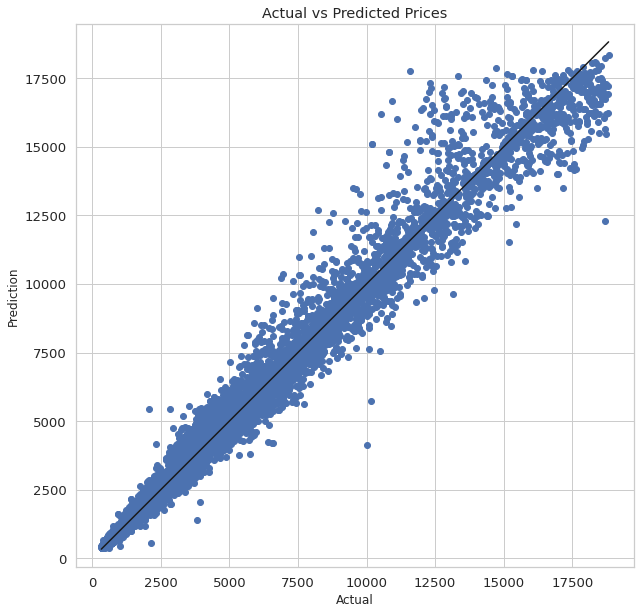

In [64]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred2)

point1 = max(max(y_pred2), max(y_test))
point2 = min(min(y_pred2), min(y_test))
plt.plot([point1, point2], [point1, point2], "k-")
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Prediction', fontsize=12)
plt.title('Actual vs Predicted Prices')
plt.axis('equal')
plt.show()

# KNeighbors Regressor

In [65]:
from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor()
model3.fit(X_train, y_train)

KNeighborsRegressor()

In [66]:
y_pred3 = model3.predict(X_test)

In [67]:
model3.score(X_train, y_train) #KNeighbors model score on train data

0.9593271120141054

In [68]:
KNeighbors_score = model3.score(X_test, y_test)*100
KNeighbors_score #KNeighbors model score on test data

94.04958434444201

In [69]:
print("R Squared value is: ", r2_score(y_test, y_pred3))
print("Mean Squared Error value is:", mean_squared_error(y_test,y_pred3))
print("Root Mean Squared Error value is:",np.sqrt(mean_squared_error(y_test, y_pred3)))

R Squared value is:  0.94049584344442
Mean Squared Error value is: 934791.9632421208
Root Mean Squared Error value is: 966.8464010597137


### Model Evaluation on a test diamond for KNeighbors


In [70]:
model3.predict([testing_diamond])[0]

8975.4

### Actual vs Predicted Prices for KNeighbors Regressor

In [71]:
Regressor_X = X.drop(['Predicted_Price','Actual_Price'],axis=1)

In [72]:
Regressor_X['Predicted_Price'] = model3.predict(Regressor_X)
Regressor_X['Actual_Price'] = y

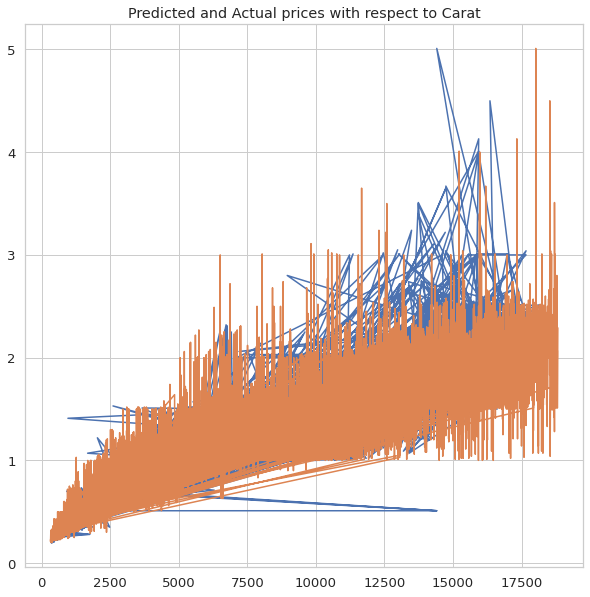

In [73]:
plt.figure(figsize=(10,10))
yax_value = Regressor_X[['carat']]
xax_value = Regressor_X[['Predicted_Price','Actual_Price']]
plt.plot(xax_value, yax_value)
plt.title('Predicted and Actual prices with respect to Carat')
plt.show()

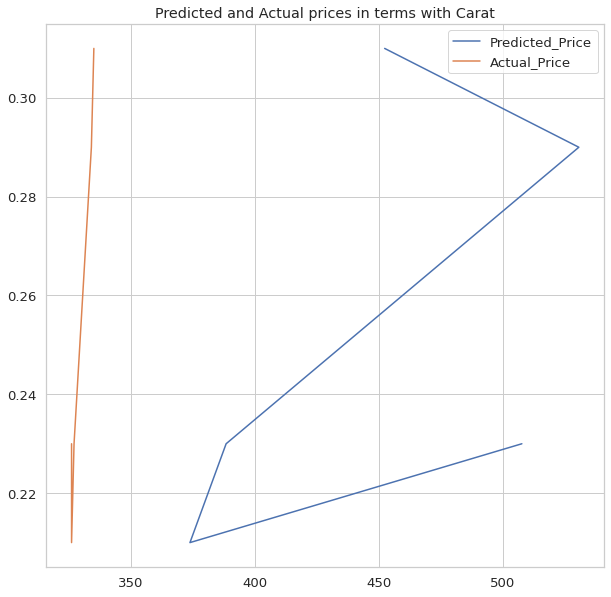

In [74]:
a = Regressor_X[['carat']].head()
plt.figure(figsize=(10,10))
yax_value = a
xax_value = Regressor_X[['Predicted_Price','Actual_Price']].head()
plt.plot(xax_value, yax_value)
plt.title('Predicted and Actual prices in terms with Carat')
plt.legend(xaxis_value)
plt.show()


# DecisionTreeRegressor

In [75]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor()
model1.fit(X_train, y_train)

DecisionTreeRegressor()

In [76]:
imp=model1.feature_importances_
imp

array([0.62470071, 0.0021841 , 0.02731284, 0.0687002 , 0.00517798,
       0.00299819, 0.26892599])

In [77]:
combo=pd.Series(imp,X_train.columns)
combo

carat      0.624701
cut        0.002184
color      0.027313
clarity    0.068700
depth      0.005178
table      0.002998
vol        0.268926
dtype: float64

<AxesSubplot:>

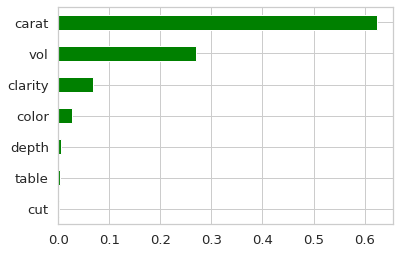

In [78]:
combo.sort_values().plot.barh(color='green')

In [79]:
y_pred1 = model1.predict(X_test)

In [80]:
model1.score(X_train, y_train) #Decision model score on train data

0.9999332697401478

In [81]:
Decision_tree_score = model1.score(X_test,y_test)*100
Decision_tree_score #Decision model score on test data

96.6602221708248

In [82]:
print("R Squared value is: ", r2_score(y_test, y_pred1))
print("Mean Squared Error value is:", mean_squared_error(y_test,y_pred1))
print("Root Mean Squared Error value is:",np.sqrt(mean_squared_error(y_test, y_pred1)))

R Squared value is:  0.9666022217082479
Mean Squared Error value is: 524668.8054154823
Root Mean Squared Error value is: 724.3402552775058


### Model Evaluation on a test diamond for Decision Tree

In [83]:
model1.predict([testing_diamond])[0]

369.0

# Actual vs Predicted Prices for Decision Tree

In [84]:
decision_X = X.drop(['Predicted_Price','Actual_Price'],axis=1)

In [85]:
decision_X['Predicted_Price'] = model1.predict(decision_X)

In [86]:
decision_X['Actual_Price'] = y

#### We added the predicted price from the Decision Tree model next to the actual price from the dataset

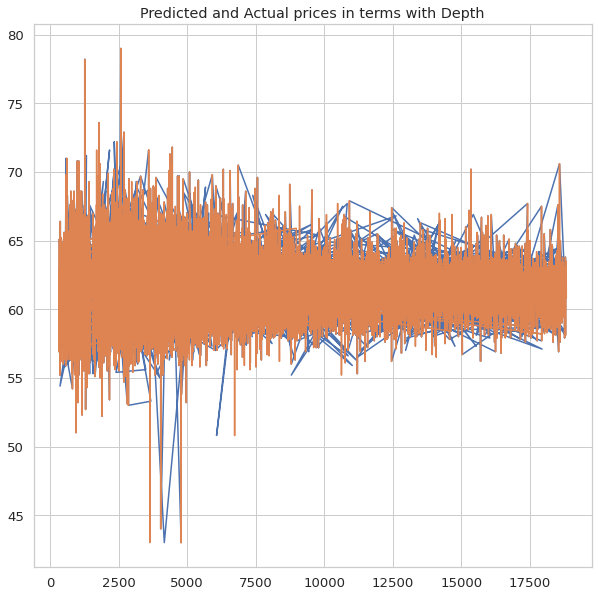

In [87]:
plt.figure(figsize=(10,10))
y_value = decision_X[['depth']]
x_value = decision_X[['Predicted_Price','Actual_Price']]
plt.plot(x_value, y_value)
plt.title('Predicted and Actual prices in terms with Depth')
plt.show()

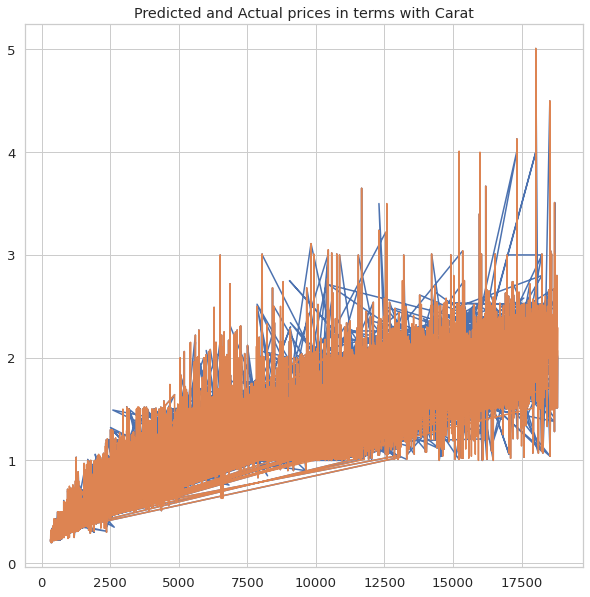

In [88]:
plt.figure(figsize=(10,10))
y_value = decision_X[['carat']]
x_value = decision_X[['Predicted_Price','Actual_Price']]
plt.plot(x_value, y_value)
plt.title('Predicted and Actual prices in terms with Carat')
plt.show()

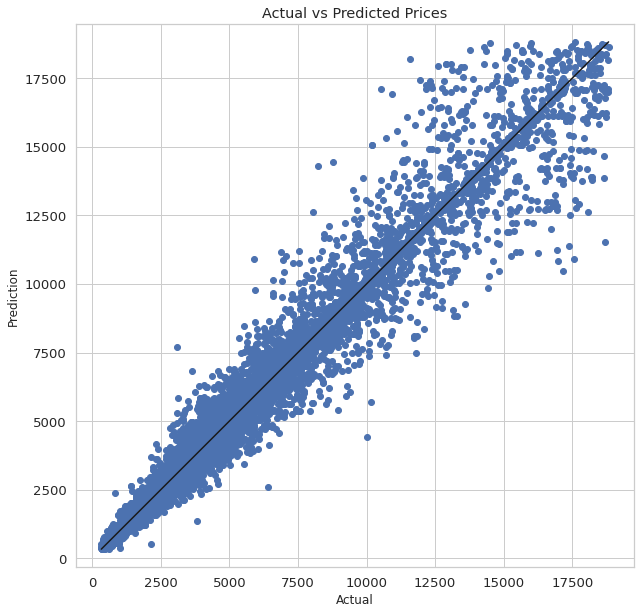

In [89]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred1)

point_1 = max(max(y_pred1), max(y_test))
point_2 = min(min(y_pred1), min(y_test))
plt.plot([point_1, point_2], [point_1, point2], "k-")
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Prediction', fontsize=12)
plt.title('Actual vs Predicted Prices')
plt.axis('equal')
plt.show()

# Let's compare all the 4 models

In [90]:
compare_models = pd.DataFrame({
    'Models':['Linear Regression', 'Random Forest Regressor', 'KNeighbors Regression', 'Decision Tree Regressor'],
    'Accuracy':[linear_model_score, Random_forest_score, KNeighbors_score, Decision_tree_score],
    'R2 Score':[r2_score(y_test, y_predlr),r2_score(y_test, y_pred2),r2_score(y_test, y_pred3),r2_score(y_test, y_pred1)]
}, index=[1,2,3,4])

In [91]:
compare_models

,Models,Accuracy,R2 Score
1,Linear Regression,88.077796,0.880778
2,Random Forest Regressor,98.082807,0.980828
3,KNeighbors Regression,94.049584,0.940496
4,Decision Tree Regressor,96.660222,0.966602


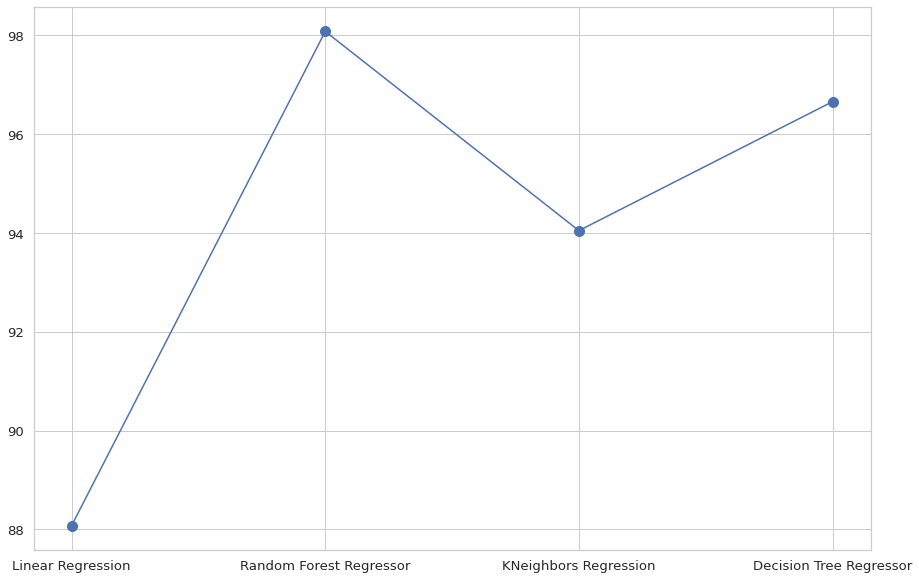

In [92]:
plt.figure(figsize=(15,10))
plt.plot(compare_models['Models'],compare_models['Accuracy'], marker= 'o', ms=10)
plt.show()